In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tfidf_data = pd.read_csv('../Data/all_tfidf_vector.csv')
word2vec_data = pd.read_csv('../Data/all_word2vec_vector.csv')
word2vec_selftrain_data = pd.read_csv('../Data/all_word2vec_vector_selftrain.csv')
bert_data = pd.read_csv('../Data/all_bert_vector.csv')
bert_selftrain_data = pd.read_csv('../Data/all_bert_vector_self_train.csv')

tfidf_breeze_data = pd.read_csv('../Data/breeze_tfidf_vector.csv')
word2vec_breeze_data = pd.read_csv('../Data/breeze_word2vec_vector.csv')
word2vec_selftrain_breeze_data = pd.read_csv('../Data/breeze_word2vec_vector_selftrain.csv')
bert_breeze_data = pd.read_csv('../Data/breeze_bert_vector.csv')
bert_selftrain_breeze_data = pd.read_csv('../Data/breeze_bert_vector_self_train.csv')

In [3]:
def pca_combined_visualization(df1, df2):

    # 將source欄位中的 'ptt' 和 'gpt' 分別標識為 'Human' 和 'ChatGPT'
    df1['source'] = df1['source'].map({'ptt': 'Human', 'gpt': 'ChatGPT'})
    # 檔案二的資料來自 'breeze'
    df2['source'] = 'Breeze'

    # 合併兩個資料框
    df = pd.concat([df1, df2], ignore_index=True)

    # 確保 'source' 列存在並且已正確映射
    if 'source' not in df.columns:
        raise ValueError("Source column not found in the combined DataFrame")

    # 將嵌入向量和標籤分開
    X = df.drop(columns='source').values  # 使用 drop 方法並指定 columns 參數
    y = df['source'].values

    # 使用PCA進行降維
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # 創建一個新的DataFrame來存儲降維後的結果和標籤
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['source'] = y

    # 繪製散點圖
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')
    plt.title('PCA of Human, ChatGPT, and Breeze Generated Texts')
    plt.show()

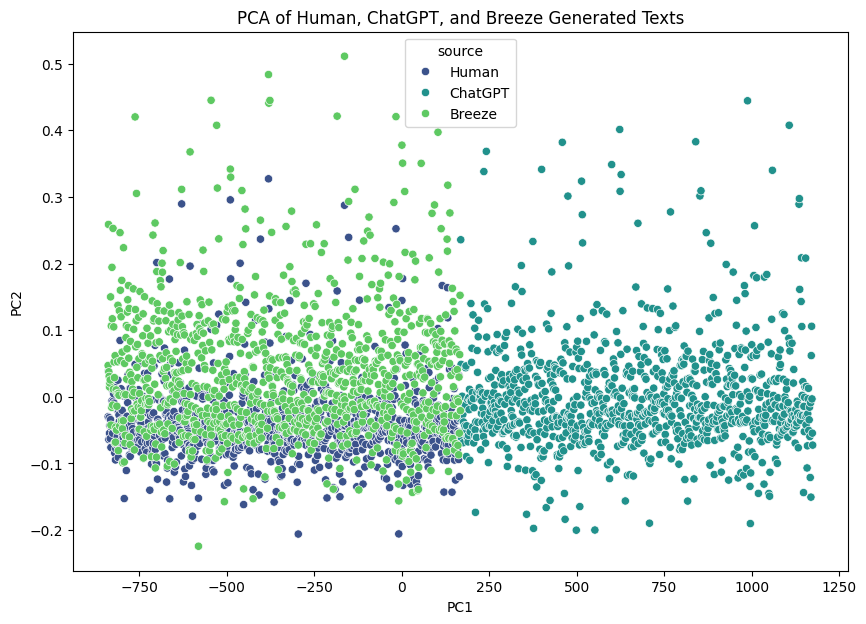

In [4]:
pca_combined_visualization(tfidf_data, tfidf_breeze_data)

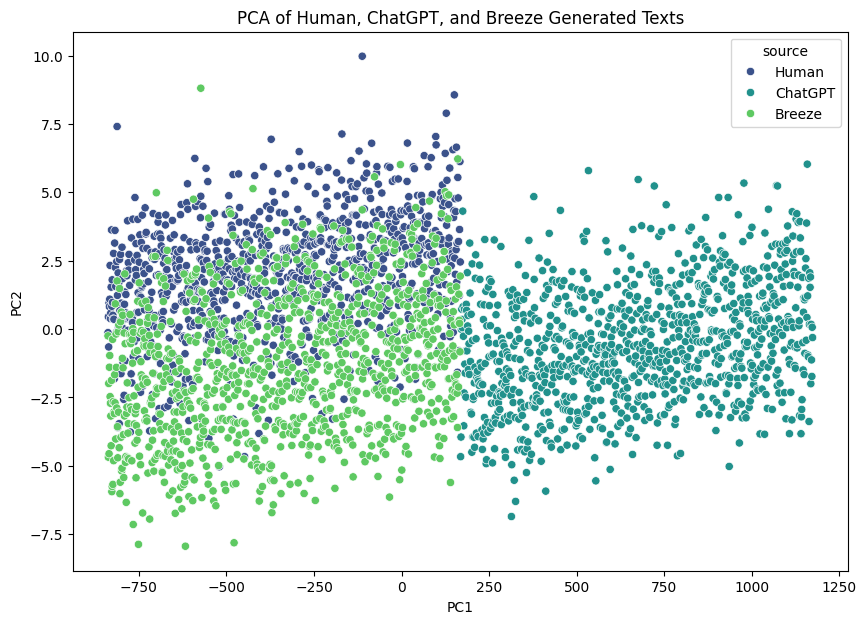

In [5]:
pca_combined_visualization(word2vec_data, word2vec_breeze_data)

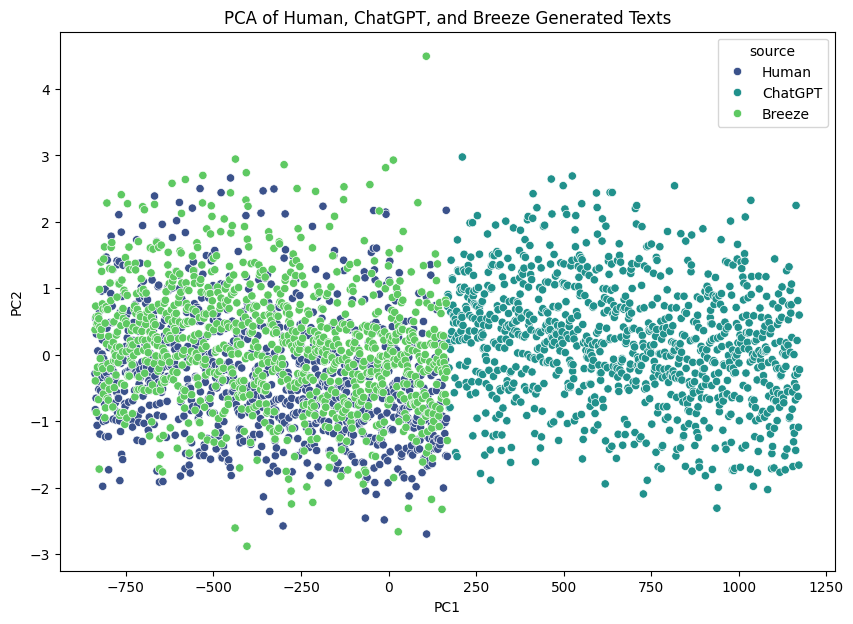

In [6]:
pca_combined_visualization(word2vec_selftrain_data, word2vec_selftrain_breeze_data)

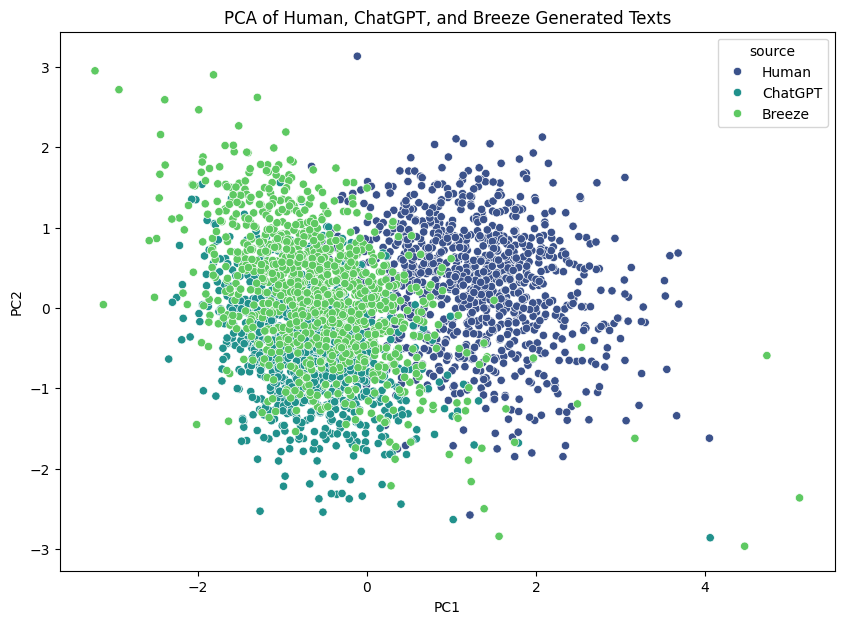

In [7]:
pca_combined_visualization(bert_data, bert_breeze_data)

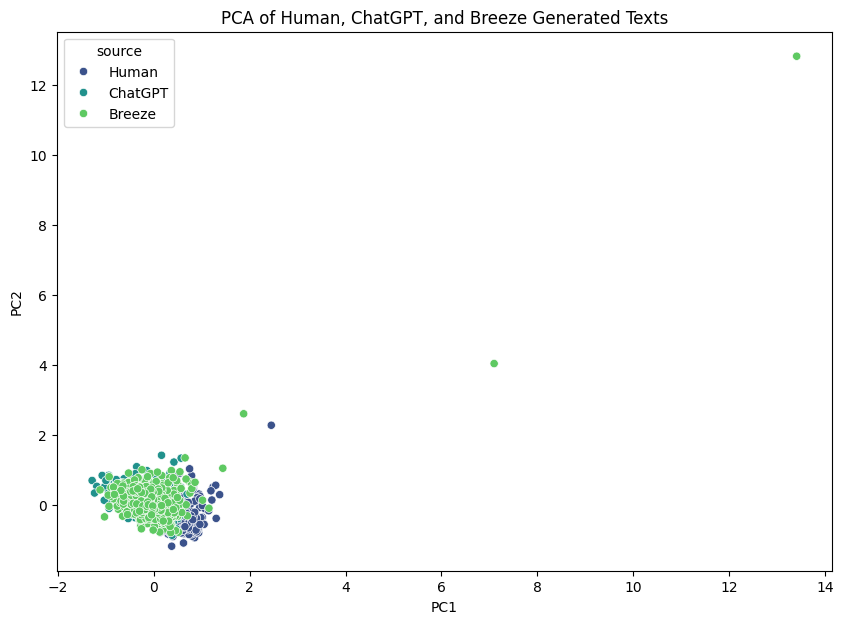

In [8]:
pca_combined_visualization(bert_selftrain_data, bert_selftrain_breeze_data)

In [9]:
def kernelPCA_combined_visualization(df1, df2):
    # 將source欄位中的 'ptt' 和 'gpt' 分別標識為 'Human' 和 'ChatGPT'
    df1['source'] = df1['source'].map({'ptt': 'Human', 'gpt': 'ChatGPT'})

    # 檔案二的資料來自 'breeze'
    df2['source'] = 'Breeze'

    # 合併兩個資料框
    df = pd.concat([df1, df2], ignore_index=True)

    # 確保 'source' 列存在並且已正確映射
    if 'source' not in df.columns:
        raise ValueError("Source column not found in the combined DataFrame")

    # 檢查合併後的數據
    print("Combined DataFrame head:\n", df.head())

    # 將嵌入向量和標籤分開
    X = df.drop(columns='source').values  # 使用 drop 方法並指定 columns 參數
    y = df['source'].values

    # 對數據進行標準化處理
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 使用KernelPCA進行降維
    kpca = KernelPCA(n_components=2, kernel='rbf')
    X_kpca = kpca.fit_transform(X_scaled)

    # 創建一個新的DataFrame來存儲降維後的結果和標籤
    pca_df = pd.DataFrame(X_kpca, columns=['PC1', 'PC2'])
    pca_df['source'] = y

    # 檢查降維後的數據
    print("PCA DataFrame head:\n", pca_df.head())
    print("Value counts of 'source':\n", pca_df['source'].value_counts())

    # 繪製散點圖
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')
    plt.title('Kernel PCA of Human, ChatGPT, and Breeze Generated Texts')
    plt.show()

Combined DataFrame head:
    Unnamed: 0   丁丁   丁丼   丁偏   丁入   丁勝   丁勻   丁味  丁咬感   丁塊  ...   龜吼   龜山  \
0           0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1           1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2           2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   龜山區  龜山島   龜意   龜氣  龜苓膏   龜萬   龜龜  source  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN  

[5 rows x 37723 columns]
PCA DataFrame head:
         PC1       PC2 source
0  0.375174  0.004169    NaN
1  0.510210  0.010798    NaN
2  0.509434  0.010904    NaN
3  0.441051  0.006876    NaN
4  0.172951 -0.010016    NaN
Value co

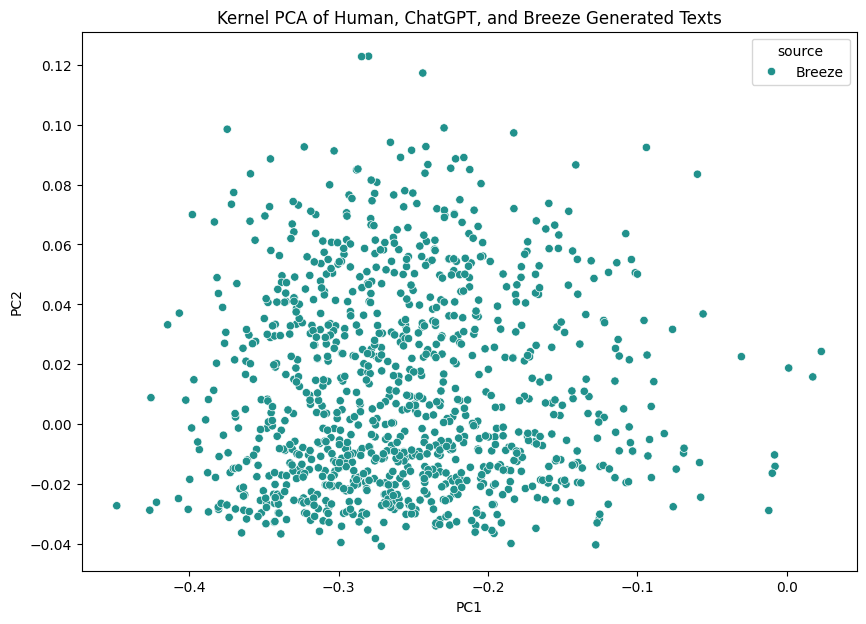

In [10]:
kernelPCA_combined_visualization(tfidf_data, tfidf_breeze_data)

Combined DataFrame head:
    Unnamed: 0        v0        v1        v2        v3        v4        v5  \
0           0 -1.050501 -0.309238 -0.647572  1.343096 -1.975475 -1.713738   
1           1 -0.046690  0.103804 -1.478838  1.634442 -1.732313 -1.400954   
2           2  0.378832 -0.869405 -0.667304  1.959609 -1.980214 -2.885767   
3           3 -0.127709 -0.245995 -0.072431  1.390077 -1.977328 -2.766569   
4           4  0.129390 -1.160234  0.458782  0.317605 -0.872890 -2.249329   

         v6        v7        v8  ...       v91       v92       v93       v94  \
0  2.073202 -1.279686  2.428653  ... -1.922642 -0.105835 -2.378017  0.300414   
1  0.551776  0.409239  2.241838  ... -2.793796  0.344434 -3.127671  1.176060   
2  0.829058 -1.180233  2.631590  ... -4.338984  0.985802 -3.387603  1.213642   
3  0.617700 -0.602556  3.171898  ... -3.503007  0.607165 -3.660436  1.148910   
4  1.720476 -1.060107  2.723367  ... -1.351717 -0.445996 -3.133747  2.061655   

        v95       v96       v9

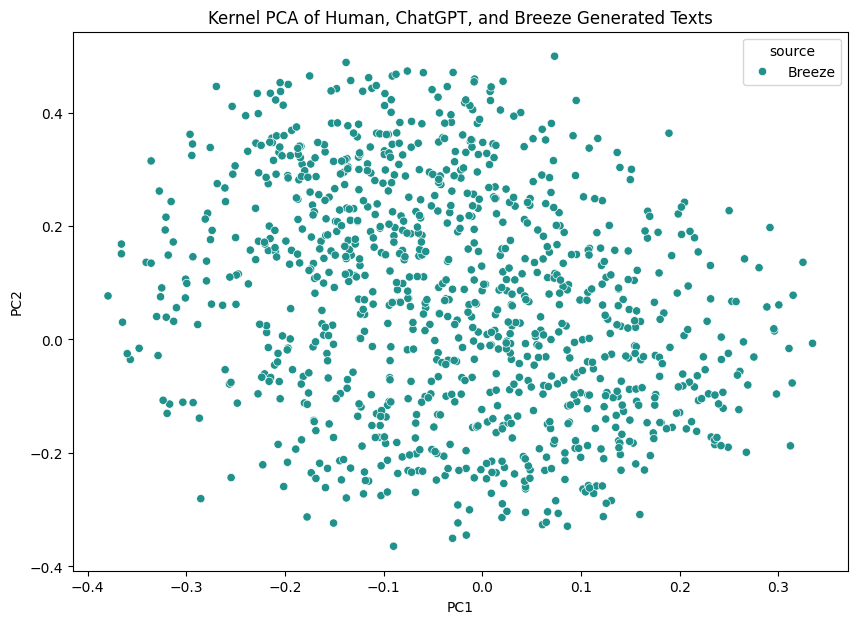

In [11]:
kernelPCA_combined_visualization(word2vec_data, word2vec_breeze_data)

Combined DataFrame head:
    Unnamed: 0        v0        v1        v2        v3        v4        v5  \
0           0 -0.208506  0.372513  0.837928 -0.170431  0.345422 -0.887671   
1           1  0.576825  0.496177  0.102655 -0.022589  0.241092 -0.793298   
2           2 -0.008875 -0.100169  0.006189 -0.109026 -0.039214  0.022982   
3           3  0.015628  0.093499  0.032362  0.061062  0.043998 -0.737446   
4           4  0.652913 -0.411251  0.034209  0.099898 -0.229291 -0.471383   

         v6        v7        v8  ...       v91       v92       v93       v94  \
0  0.079836  0.321642 -0.102080  ...  1.150246  0.614484  0.109591 -0.149689   
1 -0.190609 -0.043247  0.623796  ...  1.305454  0.225758  0.235128 -0.211599   
2  0.954016  0.034304  0.374241  ... -0.076904  0.137085 -0.042515  0.043206   
3 -0.131858 -0.174940  0.102046  ...  0.262713  0.400520  0.189910  0.080392   
4  0.482732  0.394954  0.632852  ... -0.118996  0.053613  0.786327  0.283041   

        v95       v96       v9

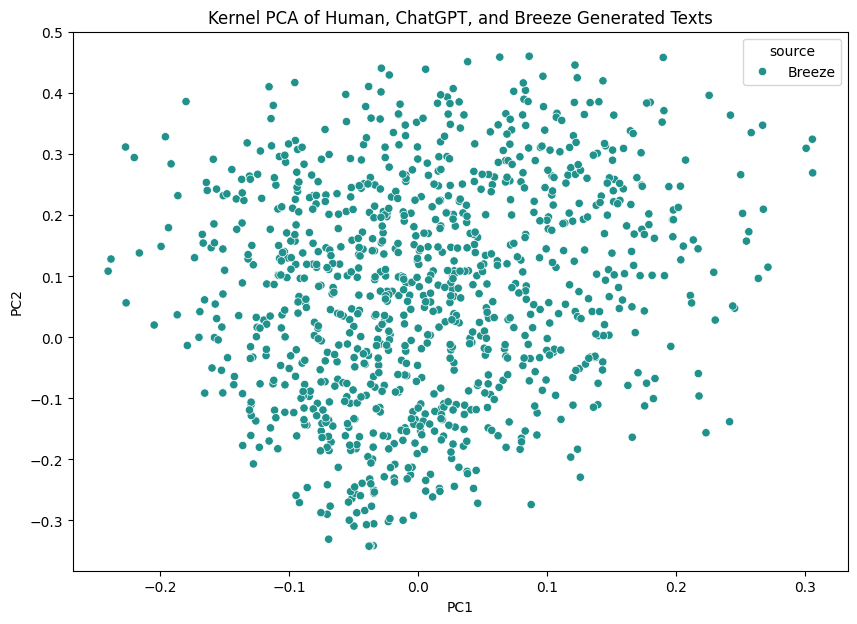

In [12]:
kernelPCA_combined_visualization(word2vec_selftrain_data, word2vec_selftrain_breeze_data)

Combined DataFrame head:
          v0        v1        v2        v3        v4        v5        v6  \
0  0.482289  0.002567 -0.588562  0.213909 -0.164422 -0.546130  0.359240   
1  0.569334  0.117720 -0.463536  0.238271 -0.190863 -0.493317  0.005829   
2  0.476065 -0.089274 -0.577052  0.177087 -0.250644 -0.576189  0.178282   
3  0.699978  0.038673 -0.629142  0.254823 -0.150740 -0.511036 -0.049724   
4  0.491805  0.090926 -0.587575  0.123280 -0.070595 -0.686657  0.377131   

         v7        v8        v9  ...      v759      v760      v761      v762  \
0  0.467617 -0.555582 -0.356817  ... -0.367303  0.120131  0.068178 -0.198242   
1  0.358729 -0.309904 -0.576790  ... -0.556465  0.099134  0.002236 -0.173020   
2  0.457851 -0.342015 -0.302689  ... -0.573780  0.145084  0.131299 -0.005712   
3  0.432495 -0.217387 -0.545995  ... -0.555327  0.139082  0.253673 -0.133184   
4  0.626218 -0.266143 -0.360932  ... -0.432081  0.375574  0.064188 -0.037194   

       v763      v764      v765      v766 

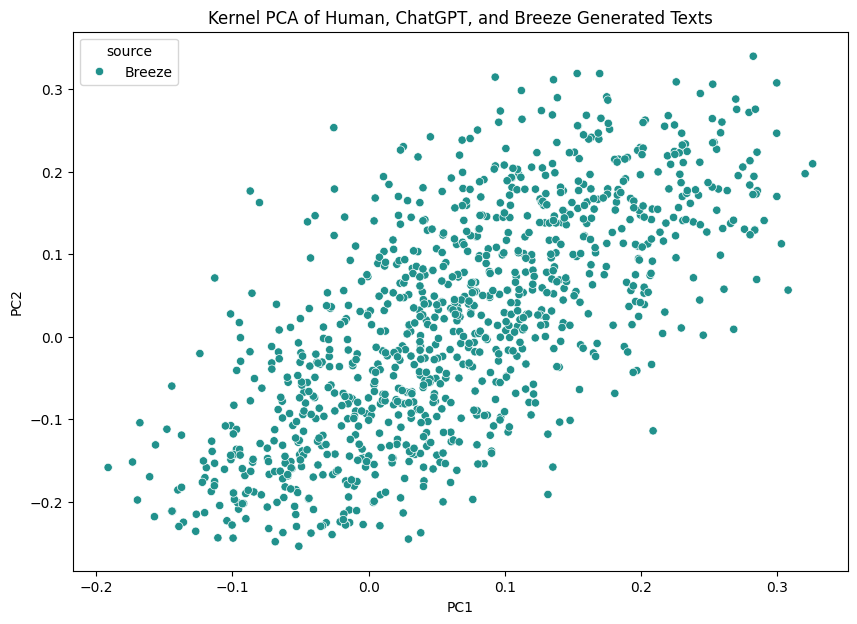

In [13]:
kernelPCA_combined_visualization(bert_data, bert_breeze_data)

Combined DataFrame head:
          v0        v1        v2        v3        v4        v5        v6  \
0 -1.290151 -2.069544  0.320216 -1.732995  0.409394  1.113627  0.109419   
1 -1.229284 -2.097604  0.286784 -1.810236  0.392532  1.162341  0.006072   
2 -1.236219 -2.089641  0.372525 -1.876724  0.356658  1.102194  0.094316   
3 -1.261068 -2.096466  0.455544 -1.755139  0.310854  1.067765  0.068338   
4 -1.451538 -1.963636  0.294902 -1.824555  0.406712  1.118677  0.167837   

         v7        v8        v9  ...      v759      v760      v761      v762  \
0  0.526334 -1.241529 -0.133260  ... -0.489204 -0.002381 -0.171901  1.300373   
1  0.558559 -1.316394  0.046587  ... -0.502432 -0.050230 -0.173466  1.463978   
2  0.442330 -1.247923 -0.055565  ... -0.447783 -0.094010 -0.183730  1.455262   
3  0.538676 -1.132204 -0.209402  ... -0.425021 -0.107217 -0.329646  1.383364   
4  0.372031 -1.265113 -0.010549  ... -0.384249  0.094192 -0.232535  1.528616   

       v763      v764      v765      v766 

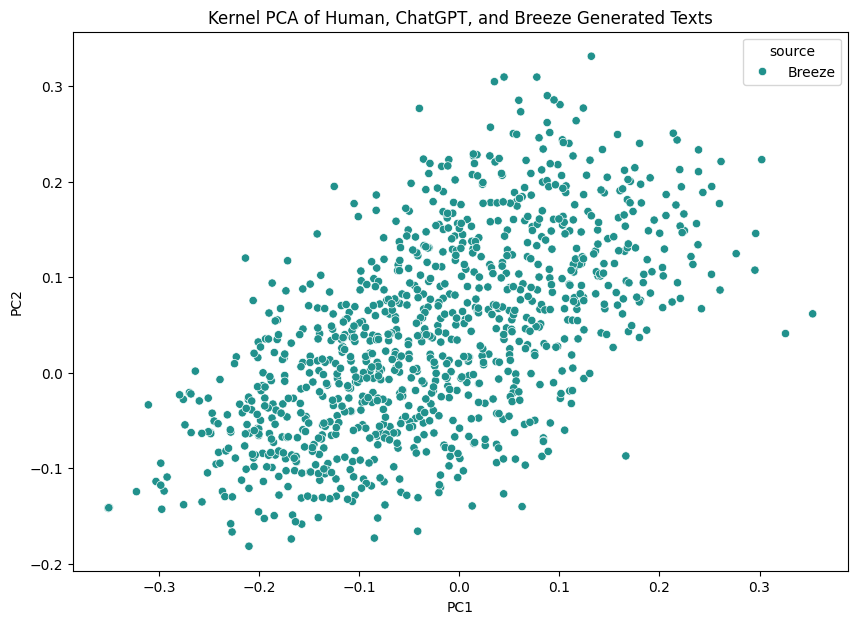

In [14]:
kernelPCA_combined_visualization(bert_selftrain_data, bert_selftrain_breeze_data)

In [15]:
def pca_visualization(df):
    # 將嵌入向量和標籤分開
    X = df.drop('source', axis=1).values
    y = df['source'].values

    # 使用PCA進行降維
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # 創建一個新的DataFrame來存儲降維後的結果和標籤
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['source'] = y

    # 將標籤轉換為更易讀的格式
    pca_df['source'] = pca_df['source'].map({'ptt': 'Human', 'gpt': 'ChatGPT'})

    # 繪製散點圖
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')
    plt.title('PCA of Human vs. Model Generated Texts')
    plt.show()

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/787454201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')


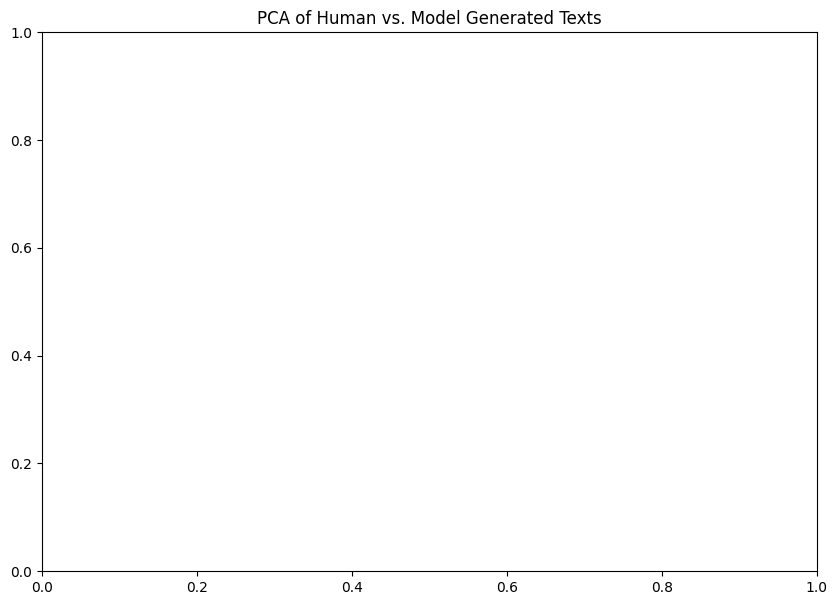

In [16]:
pca_visualization(tfidf_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/787454201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')


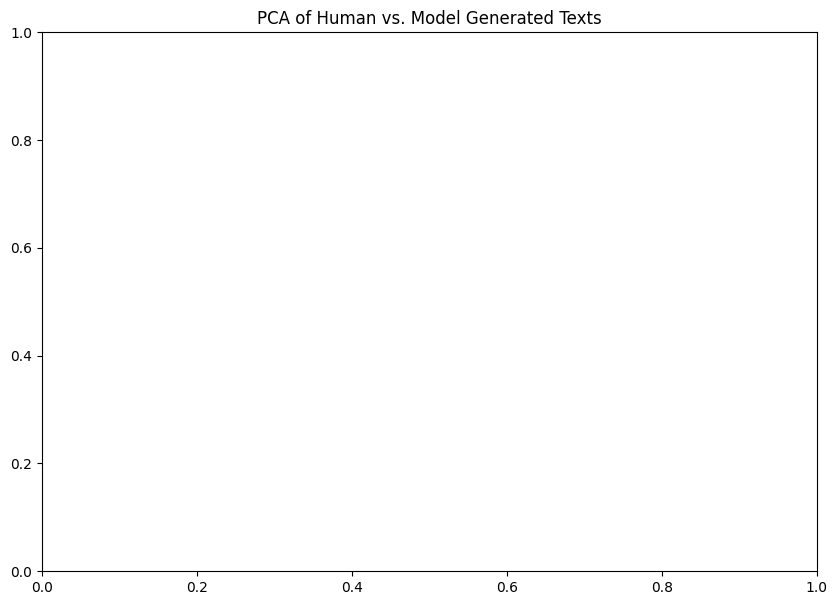

In [17]:
pca_visualization(word2vec_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/787454201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')


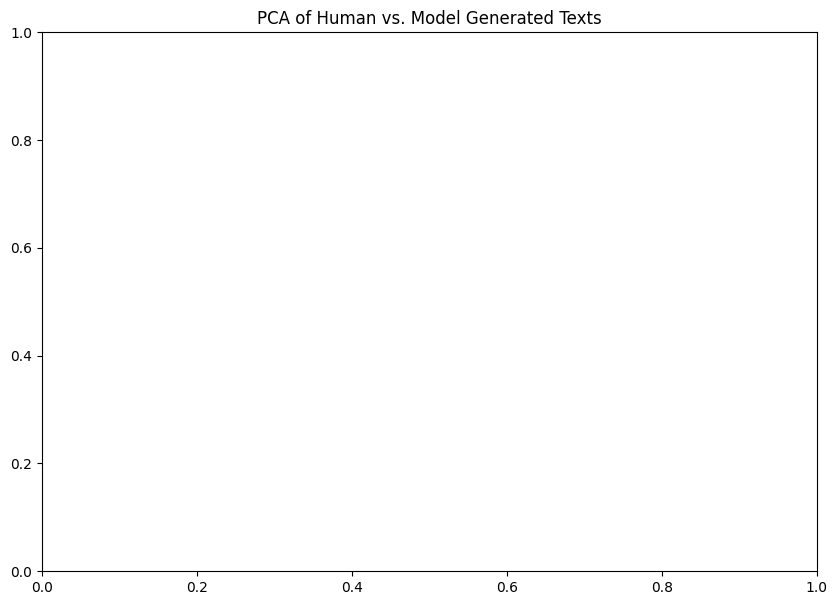

In [18]:
pca_visualization(word2vec_selftrain_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/787454201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')


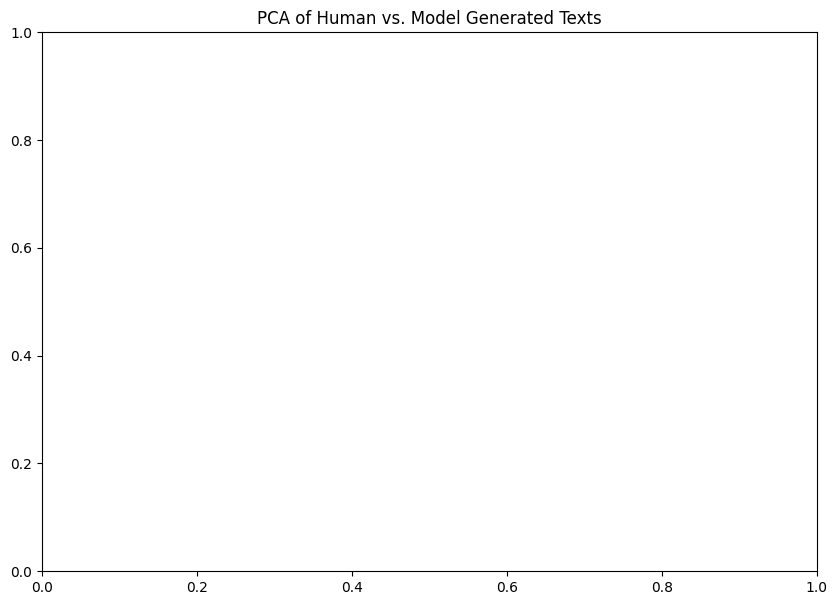

In [19]:
pca_visualization(bert_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/787454201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=pca_df, palette='viridis')


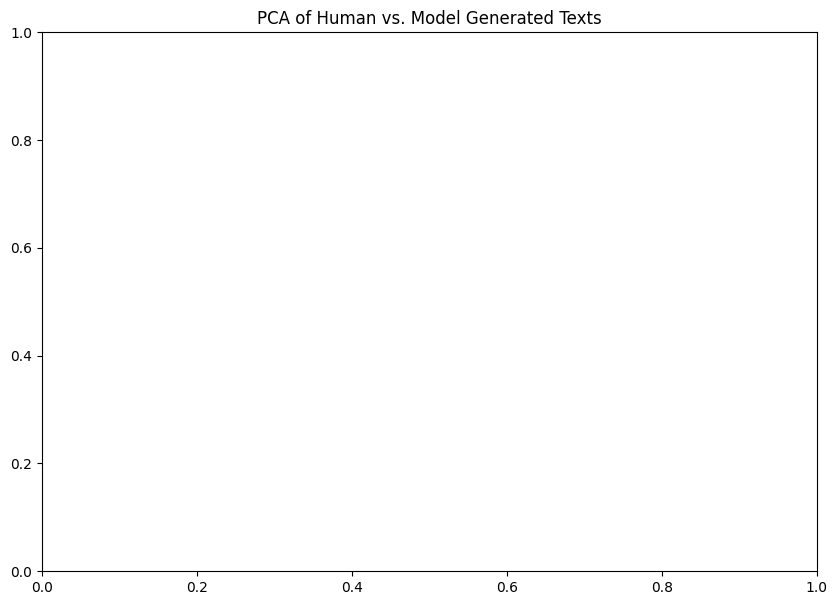

In [20]:
pca_visualization(bert_selftrain_data)

In [21]:
def kernelPCA_visualization(df):
    # 將嵌入向量和標籤分開
    X = df.drop('source', axis=1).values
    y = df['source'].values

    # 使用核PCA進行降維
    kpca = KernelPCA(n_components=2, kernel='rbf')  # 'rbf' 是常用的高斯核
    X_kpca = kpca.fit_transform(X)

    # 創建一個新的DataFrame來存儲降維後的結果和標籤
    kpca_df = pd.DataFrame(X_kpca, columns=['PC1', 'PC2'])
    kpca_df['source'] = y

    # 將標籤轉換為更易讀的格式
    kpca_df['source'] = kpca_df['source'].map({'ptt': 'Human', 'gpt': 'ChatGPT'})

    # 繪製散點圖
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')
    plt.title('Kernel PCA of Human vs. Model Generated Texts')
    plt.show()

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/1534298201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')


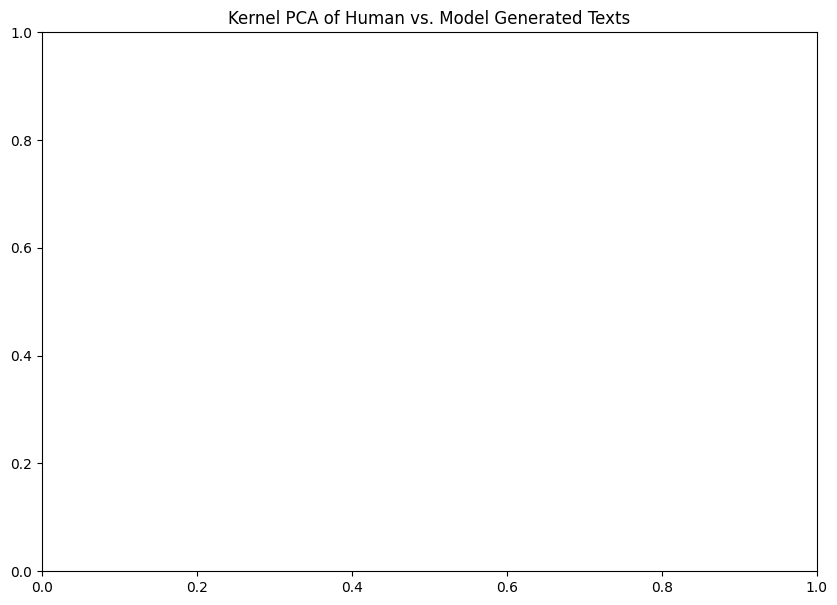

In [22]:
kernelPCA_visualization(tfidf_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/1534298201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')


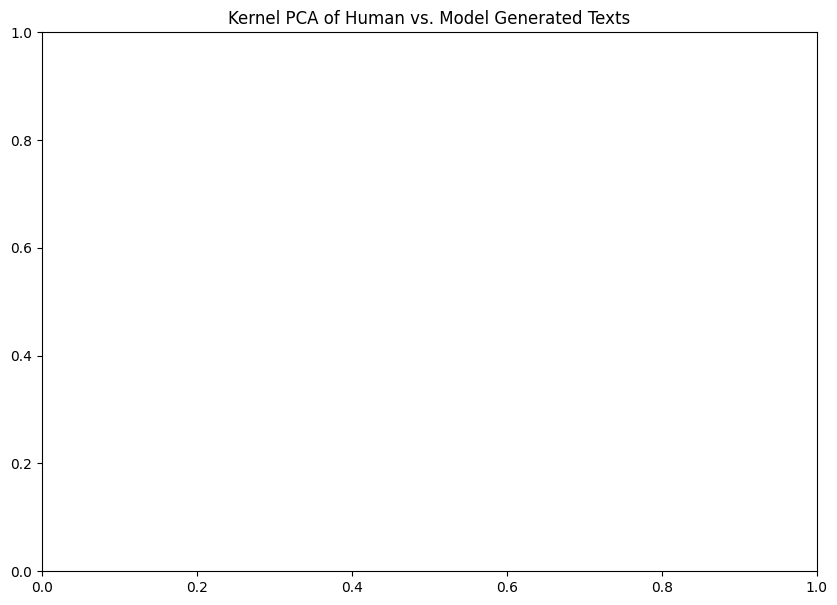

In [23]:
kernelPCA_visualization(word2vec_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/1534298201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')


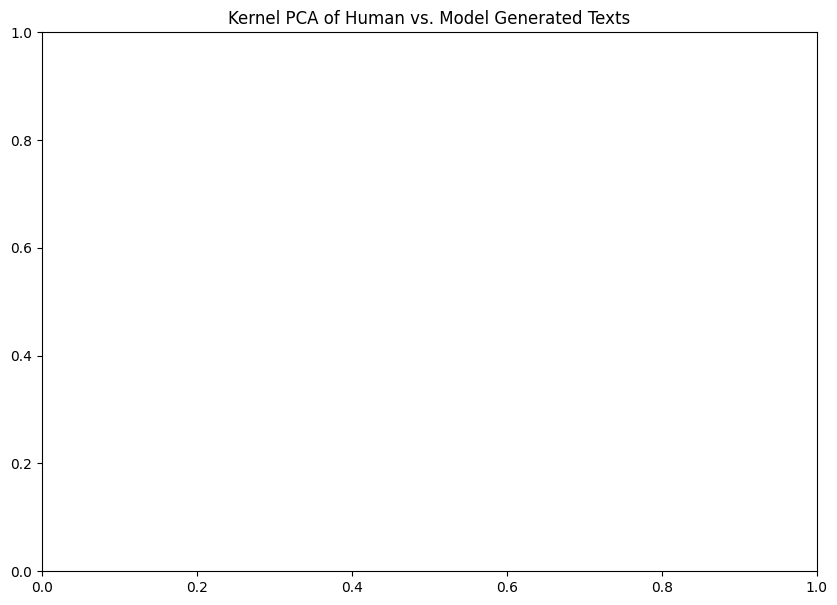

In [24]:
kernelPCA_visualization(word2vec_selftrain_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/1534298201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')


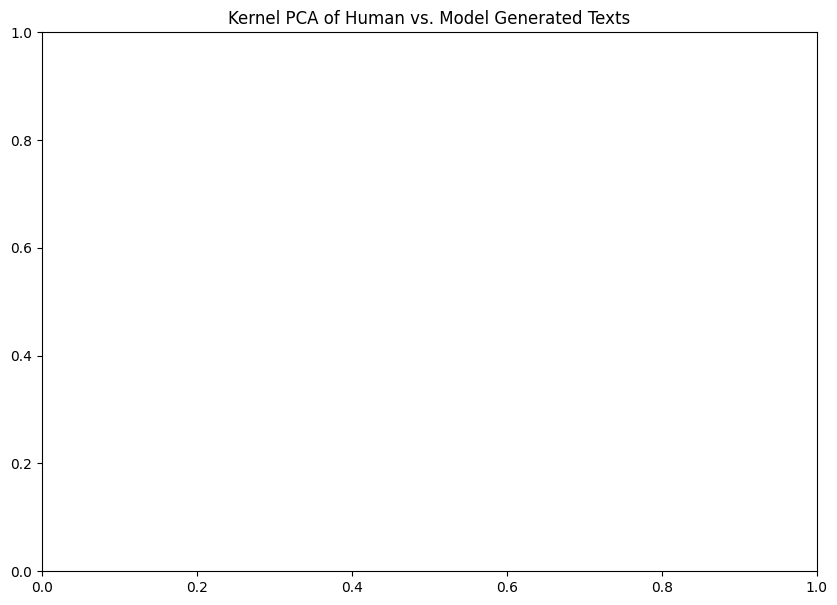

In [25]:
kernelPCA_visualization(bert_data)

/var/folders/rh/7g0n3djn3wj8dlnjv7plmzcr0000gn/T/ipykernel_58022/1534298201.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='source', data=kpca_df, palette='viridis')


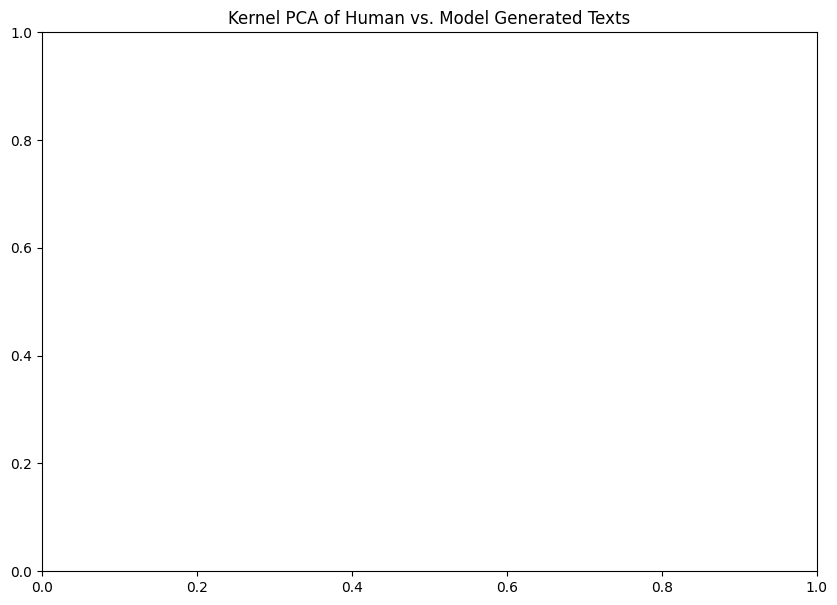

In [26]:
kernelPCA_visualization(bert_selftrain_data)